# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [563]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [564]:
data=pd.read_csv('stock_data.csv')
df=data.copy()

In [565]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [566]:
df.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [568]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


In [569]:
df.describe(include='object').T

,count,unique,top,freq
Ticker Symbol,340,340,AAL,1
Security,340,340,American Airlines Group,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


In [570]:
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [571]:
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [572]:
def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette='magma',
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
            
        )  # annotate the percentage

    plt.show()  # show the plot

In [573]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

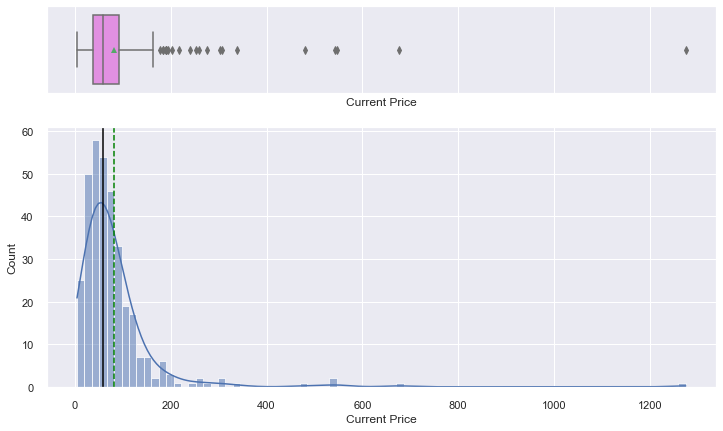

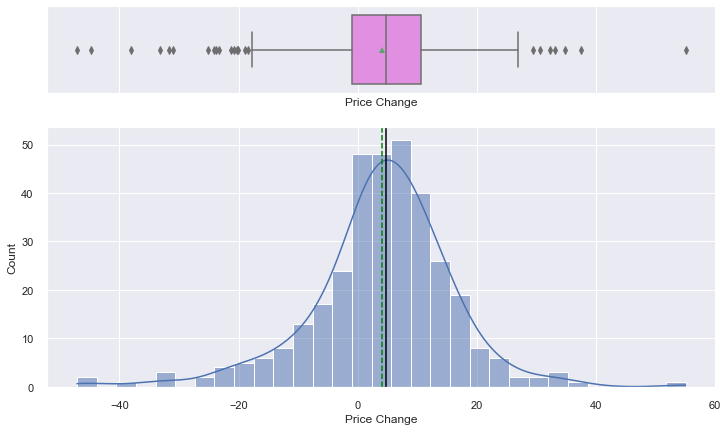

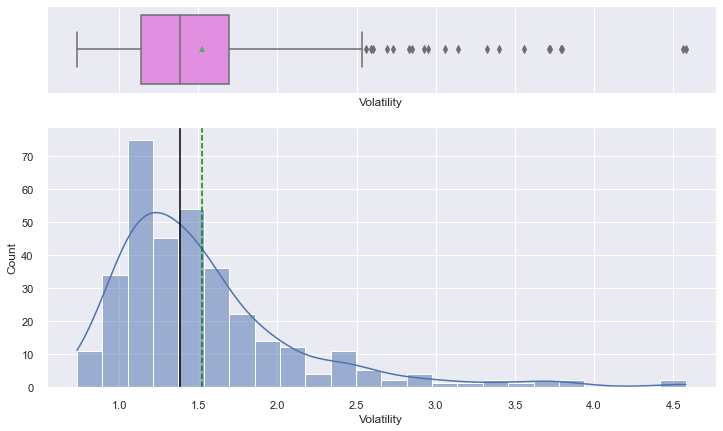

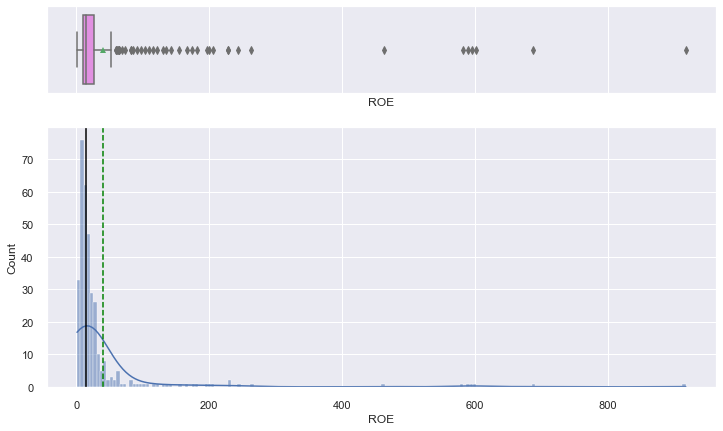

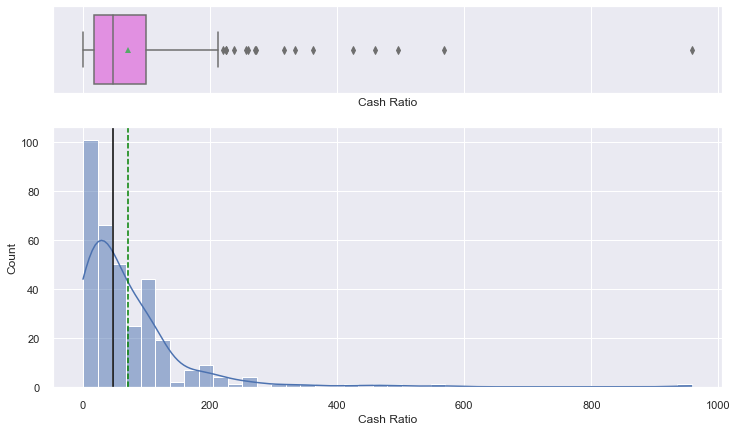

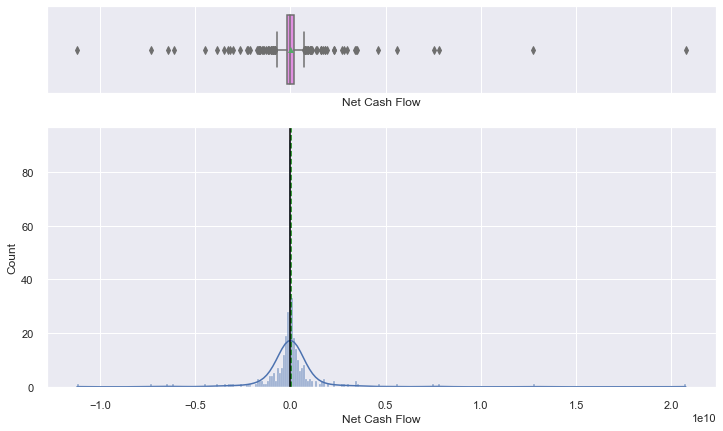

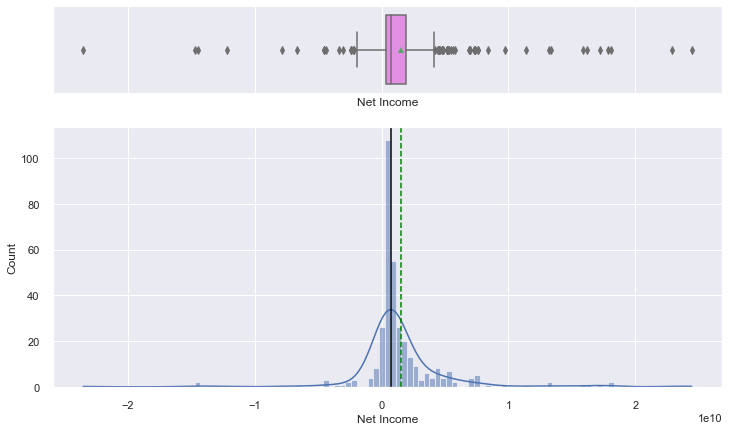

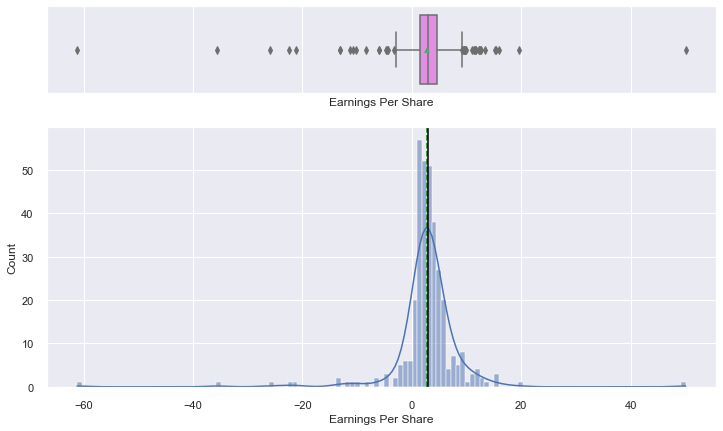

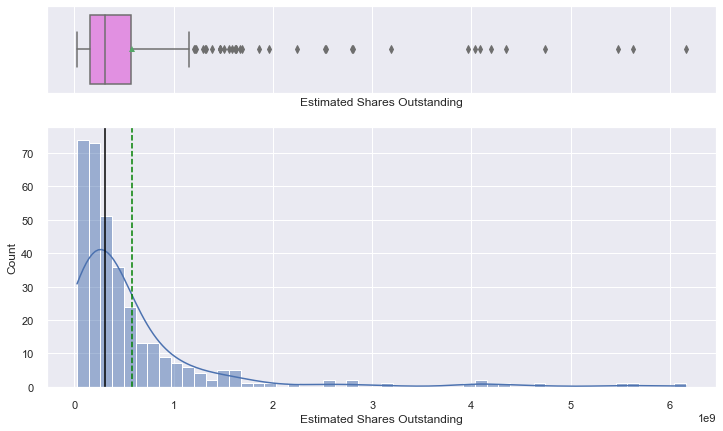

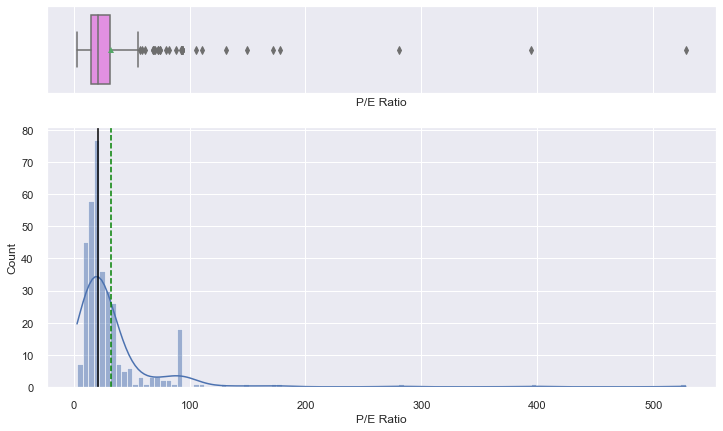

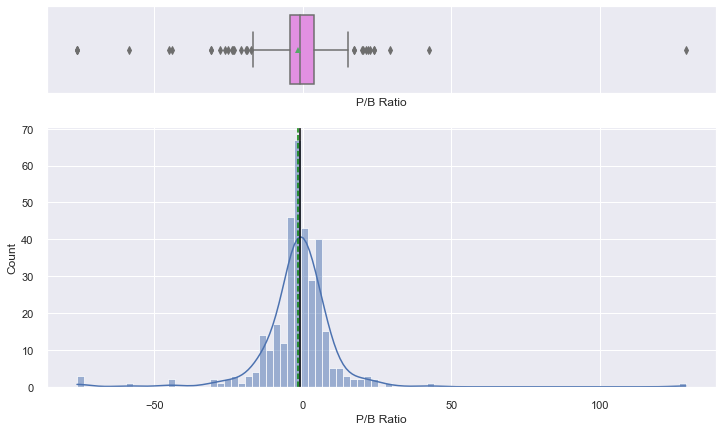

In [574]:
df_num= df.select_dtypes(include=np.number)
for feature in df_num.columns:
    histogram_boxplot(df_num, feature, figsize=(12, 7), kde=True, bins=None) 

In [575]:
df['P/B Ratio'].describe()

count    340.000000
mean      -1.718249
std       13.966912
min      -76.119077
25%       -4.352056
50%       -1.067170
75%        3.917066
max      129.064585
Name: P/B Ratio, dtype: float64

- Current price: The column is skewed to the right, with a long tail that indicates we have some extreme values. Around 75% of the data have values that fall below 100.
- Price change: We can see this column follows a distribution pretty close to normal. We have some negative values, indicating some of the stocks have decrease, the most negative data point is under -40%. 75% of the data is lie between -40 and 10 and the maximun has change price around 55% increase.  
- Volatility: This column is right skewed, the range seems to have a small range, between 0.5 and 5. 75% of the data has a variation from the average under 2 and the maximun volatility is close to 5. 
- Roe:The distribution is right skewed with some extreme values. the average of the Roe is close to 39 and 75% of the data falls bellow 27%.
- Cash Ratio: Distribution is right skewed with some extreme values or outliers. the average is arount 70. 75% of the stocks have a reserve of cash under 100. We can also see some cases that have an ectremely hight cash ratio. 
- Net cash flow:distribution is close to normal, with a lot of extreme values. The range of net cash flow goes from negatives to really high amounts.
- Net income: This column also have a wide range of values. pretty close to normal distribution with a lot of extreme values in both ends.
- Earnings per share: The distribution is close to normal, it also has a lot of extreme values.  75% of the data points fallbelow 4.62.
- Estimated shares Outstanding: It is right skewed, it has a lot of extreme values. Most of the data is concentrated between 0 and 1
- p/e ratio: It is right skewed, we hae some companies with extreme values, over 100. 75% of the data is under 50.
- p/b ratio: it is pretty close to normal distribution with some extreme values in both ends. 

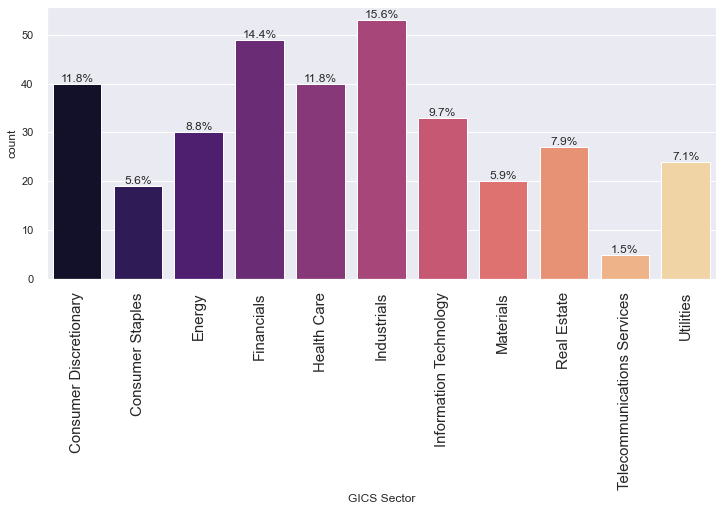

In [576]:
labeled_barplot(df, 'GICS Sector', perc=True)

- The most prevalent sector is "Industrials," constituting 15.6% of the companies, followed closely by the "Financials" sector at 14.4%. On the other hand, the "Telecommunications Service" sector has the lowest representation among the companies

In [577]:
df['GICS Sub Industry'].value_counts() 

Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Electric Utilities                                 12
Internet Software & Services                       12
Health Care Equipment                              11
MultiUtilities                                     11
Banks                                              10
Property & Casualty Insurance                       8
Diversified Financial Services                      7
Biotechnology                                       7
Pharmaceuticals                                     6
Packaged Foods & Meats                              6
Oil & Gas Refining & Marketing & Transportation     6
Semiconductors                                      6
Diversified Chemicals                               5
Consumer Finance                                    5
Integrated Oil & Gas                                5
Industrial Machinery        

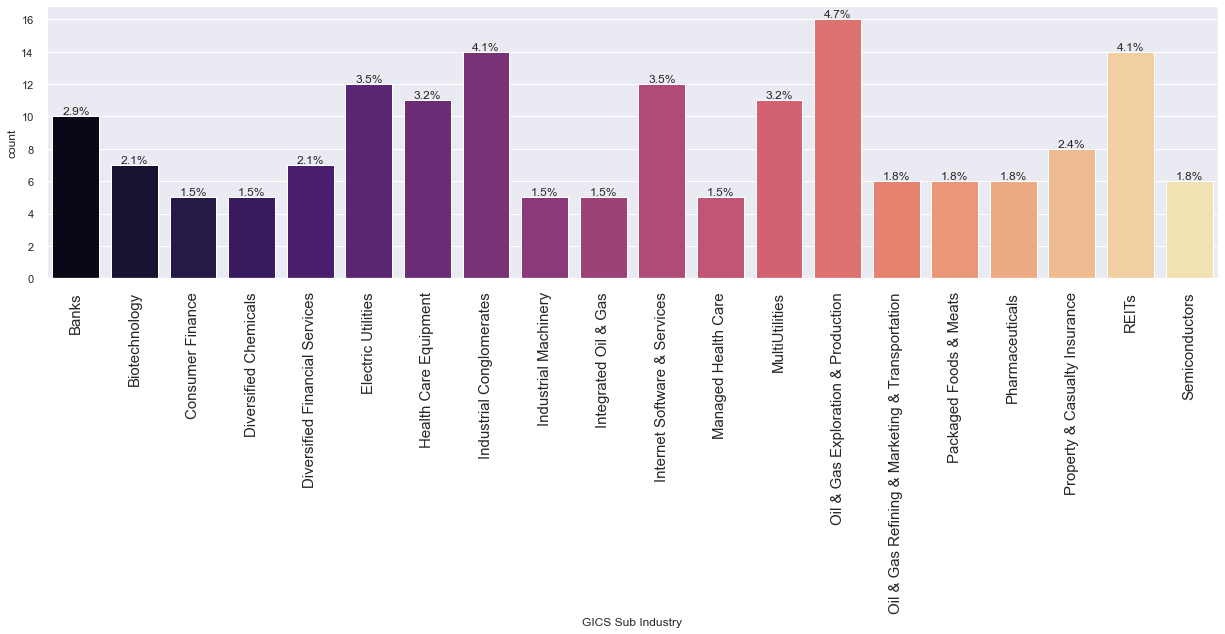

In [578]:
labeled_barplot(df, 'GICS Sub Industry', perc=True, n=20,)


- Most popular sub industry is the Oil and Gas Exploration.


### Bivariate Analysis

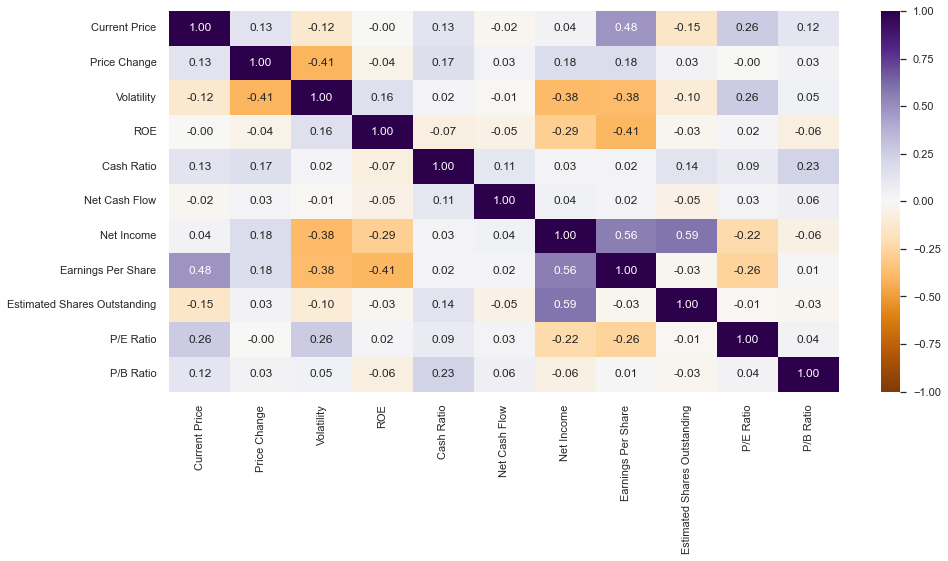

In [579]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='PuOr'
)
plt.show()

- In general there are no strong correlations between the variables.
    - The stronger positive correlation is between estimated shares outstanding and net income.
    - The stronger negative correlation is between Roe and Earnings per share, and price change and Volatility. 

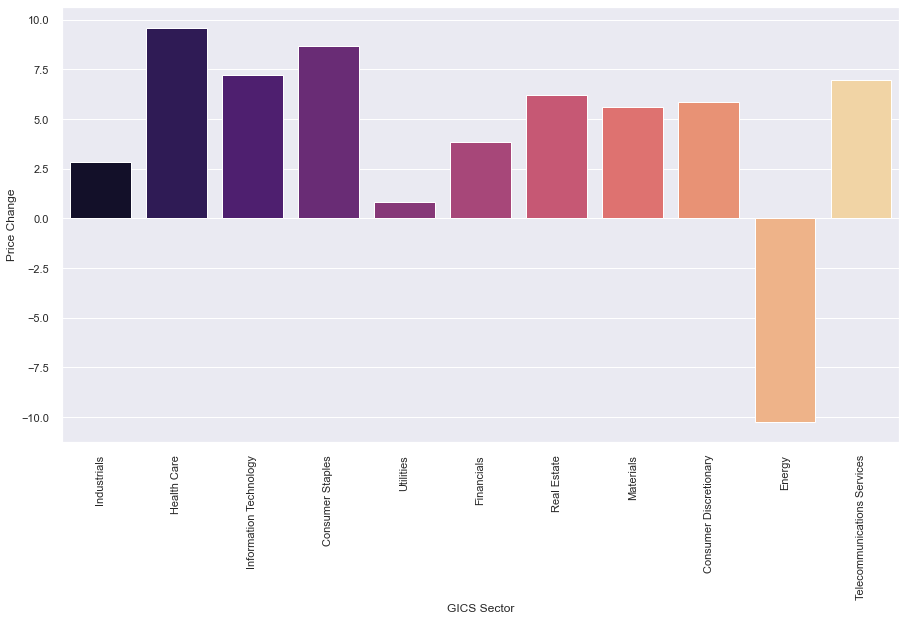

In [580]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False, 
             palette='magma')

plt.xticks(rotation=90)
plt.show()



- Energy has around -10% of increase in price while the rest of the industries have increased. 
- Health care is the the economic sector that has the most increased with almost 10%. 

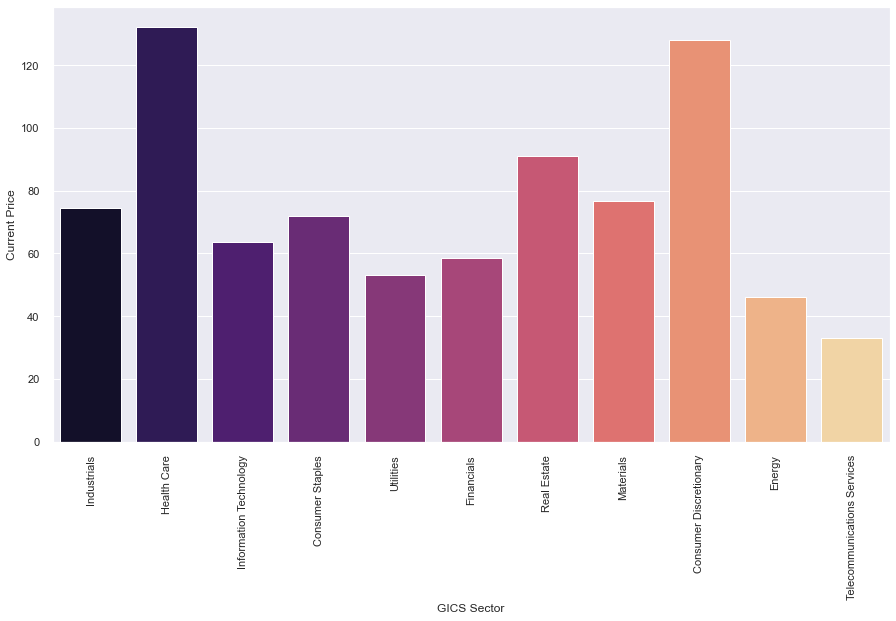

In [581]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Current Price', ci=False, palette='magma')  
plt.xticks(rotation=90)
plt.show()

- The graph shows that health care has the best current price(around 130$) follow closely by consumer discretionary(around 125$). 
- Telecommunications services is the economic sector with the worst current stock price, bellow 30$.

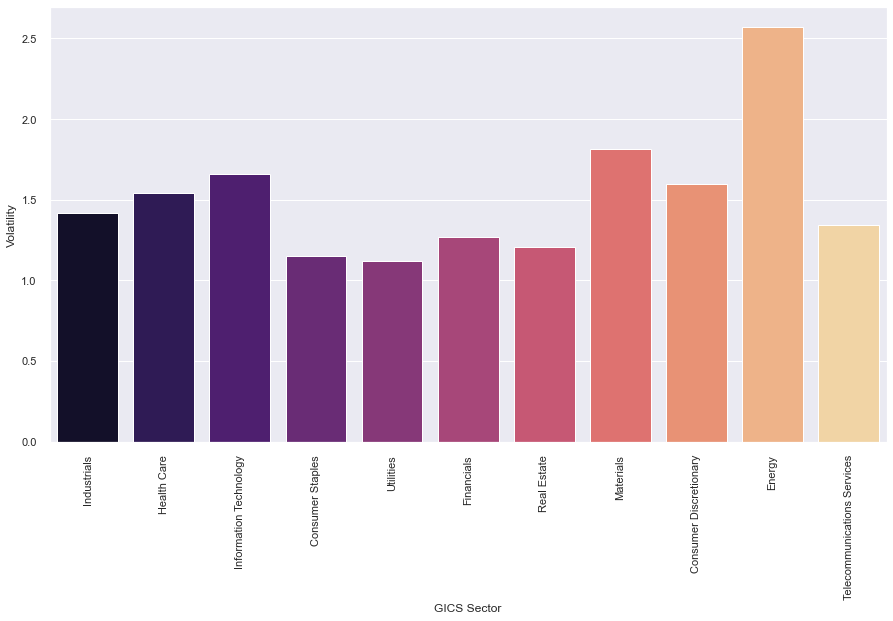

In [582]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False, palette='magma')  
plt.xticks(rotation=90)
plt.show()

- Energy is the economic sector with the most volatility.

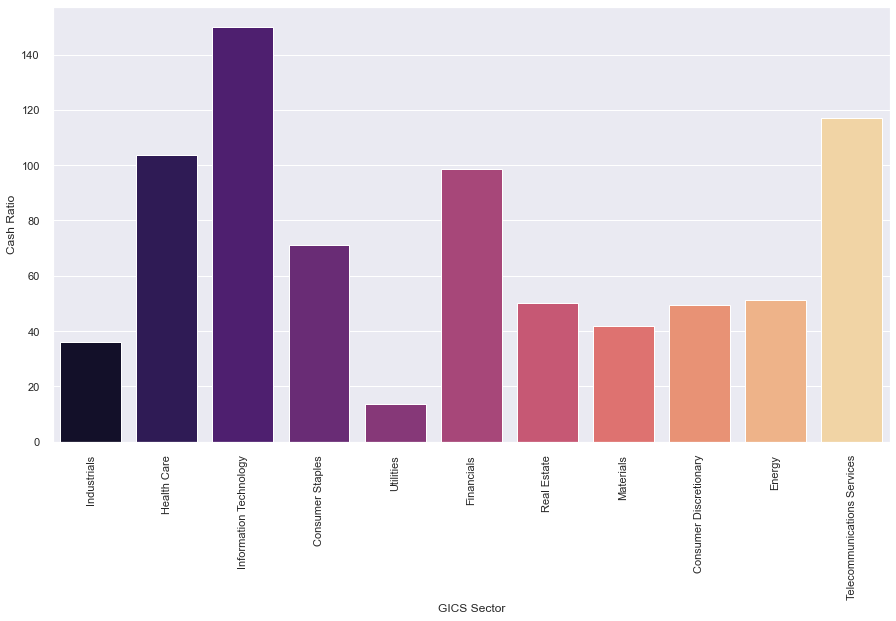

In [583]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False,palette='magma')  
plt.xticks(rotation=90)
plt.show()

- Information Technology: Companies in the Information Technology sector exhibit the highest average Cash Ratio at 149.82.
- Telecommunications Services: This economic sector has an average Cash Ratio around 118. 
- Utilities: Companies in the Utilities sector exhibit the lowest average Cash Ratio at 13.63. This indicates that companies in this sector might have lower liquidity relative to their short-term obligations.

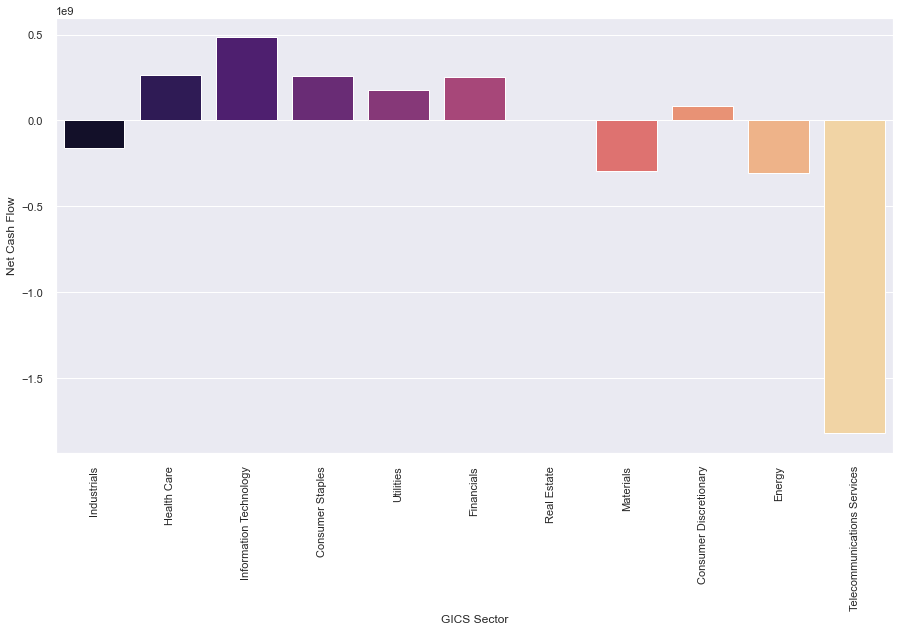

In [584]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Net Cash Flow', ci=False, palette='magma')  
plt.xticks(rotation=90)
plt.show()

- Companies in the Consumer Staples sector and  Information Technology have a positive Net Cash Flow. This indicates the financial strength and potential for innovation and growth.
- Companies in the Telecommunications Services sector have a significant negative Net Cash Flow of approximately -$1.8 billion. 

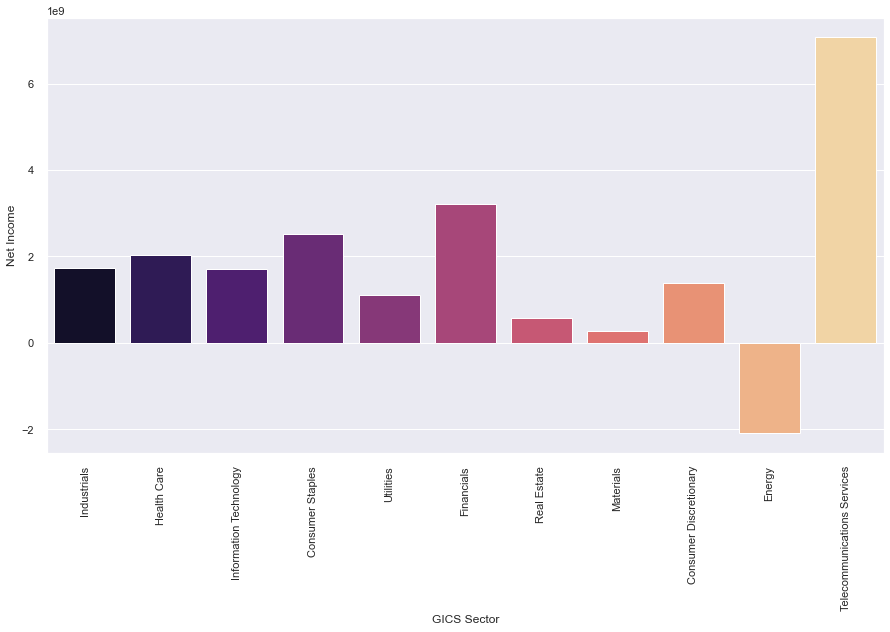

In [585]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Net Income', ci=False, palette='magma')  
plt.xticks(rotation=90)
plt.show()

- Companies in the Telecommunications Services sector report an average Net Income of around 7 billion. This sector stands out with the highest net income, possibly due to the capital-intensive nature of the telecommunications industry.

- The Financials sector reports an average net income of approximately 3 billion. This indicates healthy financial performance.

- The Energy sector reports a net loss with an average Net Income of approximately -2 billion. This suggests challenges within the energy sector, possibly influenced by fluctuations in energy markets.

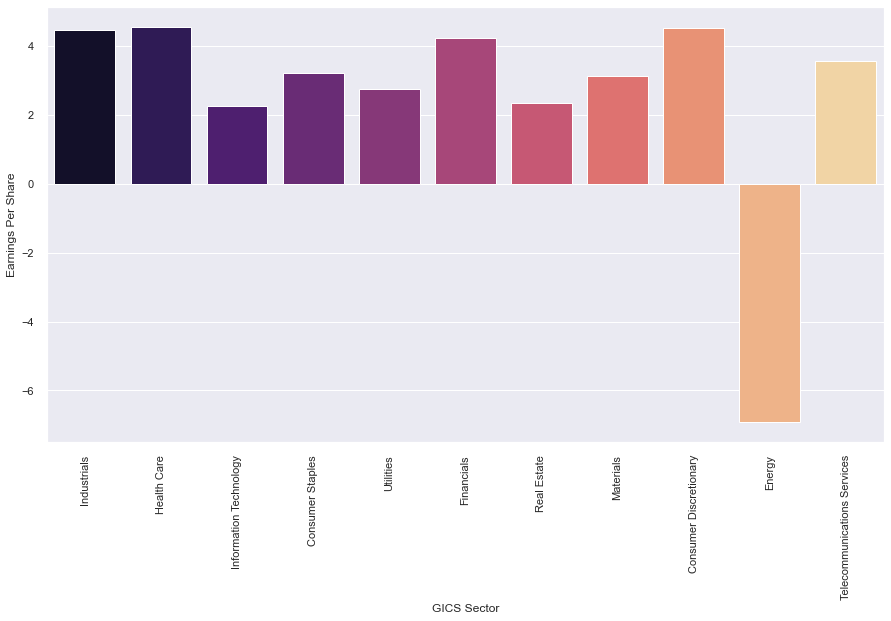

In [586]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Earnings Per Share', ci=False, palette='magma')  
plt.xticks(rotation=90)
plt.show()

- The Consumer Discretionary, Health care and Industrials sectors reports the highest Earnings Per Share.

- The Energy sector has the lowest Earnings Per Share with a value of approximately -$6. Companies in this sector are facing losses, resulting in negative earnings per outstanding share.

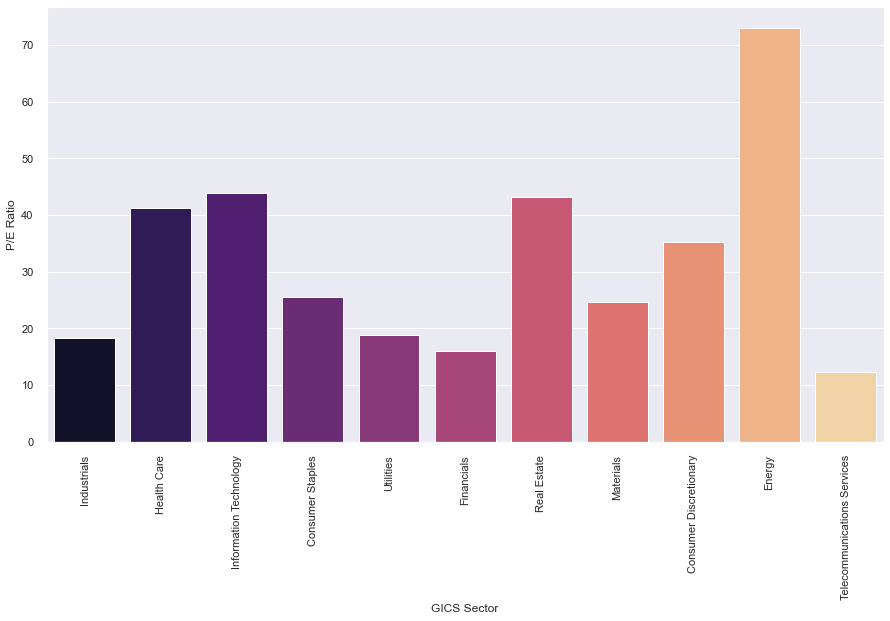

In [587]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False, palette='magma')  
plt.xticks(rotation=90)
plt.show()

- The Energy sector shows the highest average P/E Ratio of approximately 73. This suggests that, on average, stocks in this sector are relatively less attractively priced compared to their earnings, potentially making it a less favorable investment option.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [588]:
df.isnull().sum() #checking missing values

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [589]:
df.duplicated().sum() #checking duplicate values

0

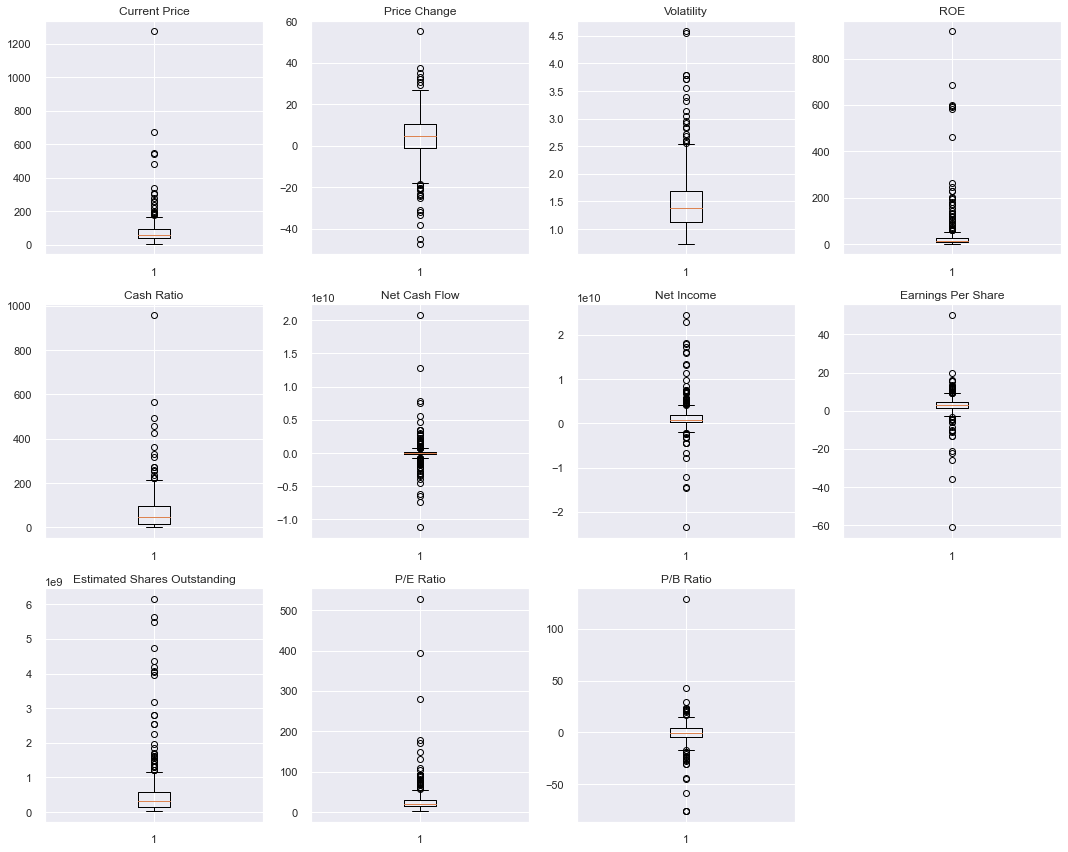

In [590]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- We have outliers in each column, but these values are legitimate and relevant to our analysis. As a result, we have decided to work with them.

In [591]:
scaler = StandardScaler() #We need to scale the data before do the clustering
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [592]:
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns) #dataframe with scale data
k_means_df = subset_scaled_df.copy() #making a copy

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


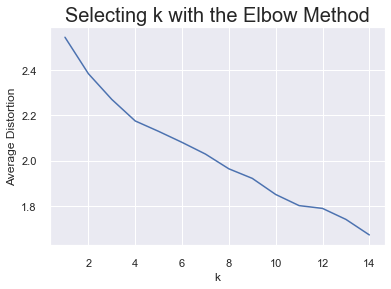

In [593]:
clusters = range(1, 15) #chosing the range
meanDistortions = []

for k in clusters: 
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779403)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.40054227372136175)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.20446696215274296)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


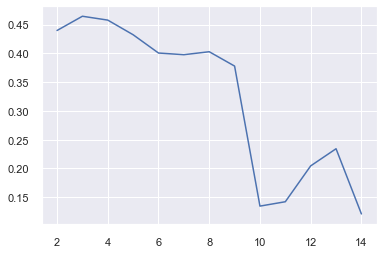

In [594]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

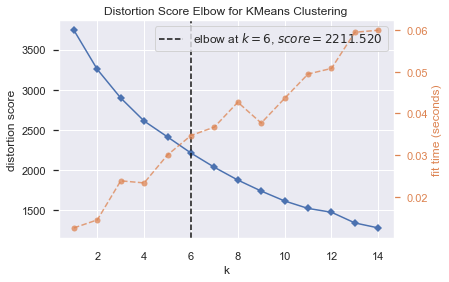

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [595]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

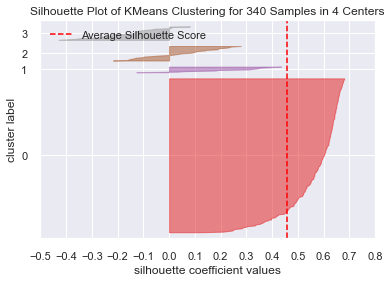

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [596]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

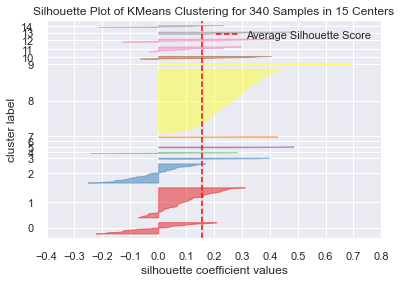

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 15 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [597]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(15, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

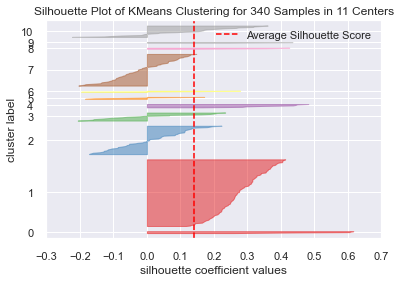

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 11 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [598]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(11, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

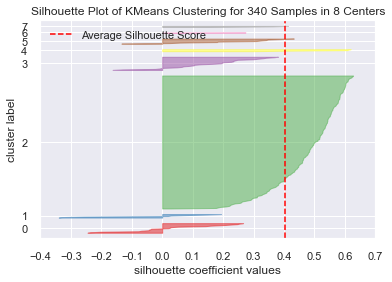

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [599]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

- The optimal number of clusters based on elbow Score is 4. So we are going to choose this option for clusters.

In [600]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=1)

In [601]:
# adding kmeans cluster labels to the original dataframe
df1 = df.copy()
subset_scaled_df["K_means_segments"] = kmeans.labels_
df1["K_means_segments"] = kmeans.labels_

In [602]:
cluster_profile = df1.groupby("K_means_segments").mean() 
cluster_profile["count_in_each_segment"] = (df1.groupby("K_means_segments")["Security"].count().values) 
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


In [603]:
df1.groupby(["K_means_segments", "GICS Sector"])['Security'].count()

K_means_segments  GICS Sector                
0                 Consumer Discretionary         33
                  Consumer Staples               17
                  Energy                          6
                  Financials                     45
                  Health Care                    29
                  Industrials                    52
                  Information Technology         24
                  Materials                      19
                  Real Estate                    26
                  Telecommunications Services     2
                  Utilities                      24
1                 Consumer Discretionary          1
                  Consumer Staples                1
                  Energy                          1
                  Financials                      3
                  Health Care                     2
                  Information Technology          1
                  Telecommunications Services     2
2                 

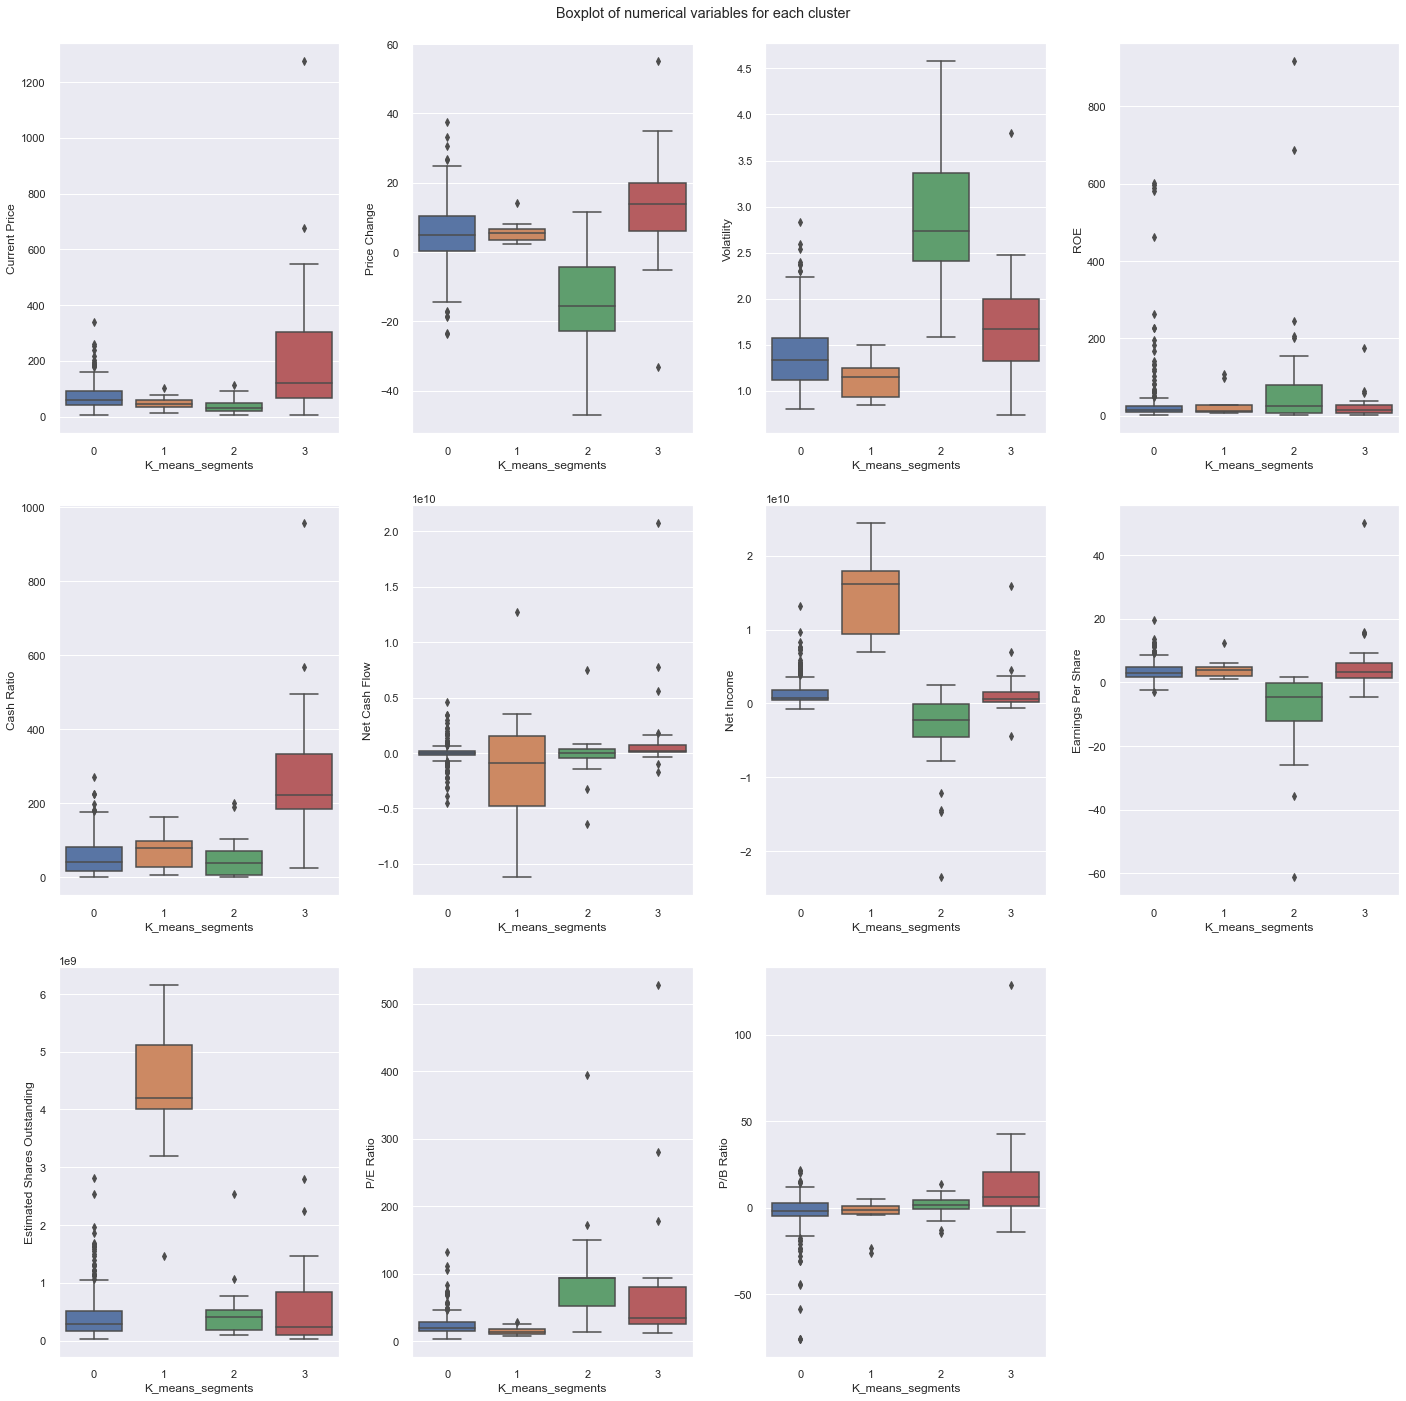

In [604]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

#### Insights

- Cluster 0:

    - There are 277 companies in this cluster.
    - The stocks of the companies in this cluster have a moderate average price.
    - They also have relatively low volatility and have an average price rise of 5%.
    - These companies tend to have a low cash ratio.
    - The net income is positive but a little low.
    - Companies in this cluster exhibit a low P/E ratio.
    - The number of outstanding shares is low.

- Cluster 1:

    - There are 11 companies in this cluster.
    - The stocks of the companies in this cluster have a low average price.
    - They also have low volatility and have an average price rise of 6%.
    - These companies tend to have a low cash ratio, but higher compared to other clusters.
    - The net income is significantly positive, indicating strong profitability.
    - Companies in this cluster show a low P/E ratio.
    - The number of outstanding shares is high.

- Cluster 2:

    - There are 27 companies in this cluster.
    - The stocks of the companies in this cluster have a low average price.
    - They have high volatility and have an average price drop of 15%.
    - These companies tend to have a low cash ratio.
    - The net income is negative, indicating losses for the companies.
    - Companies in this cluster exhibit a high P/E ratio, which might indicate a negative market sentiment.
    - The number of outstanding shares is low.

- Cluster 3:

    - There are 25 companies in this cluster.
    - The stocks of the companies in this cluster have a high average price.
    - They have moderate volatility and have an average price rise of 13.5%.
    - These companies tend to have a high cash ratio, indicating a good ability to cover short term obligations.
    - The net income is positive but relatively low.
    - Companies in this cluster exhibit a moderate P/E ratio.
    - The number of outstanding shares ranges from low to moderate.

## Hierarchical Clustering

In [605]:
hc_df = subset_scaled_df.copy() #making a copy of the scale data

In [606]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9304469769832865.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8559480642212798.
Cophenetic correlation for Euclidean distance and average linkage is 0.946403836884538.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7508819056084053.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9161627445317929.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.822502094153258.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9379218754329659.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9153206618543516.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9348505176633238.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6881861661402056.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9360657692078035.
Cophenetic corr

In [607]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print("Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]))

Highest cophenetic correlation is 0.946403836884538, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [608]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9304469769832865.
Cophenetic correlation for complete linkage is 0.8559480642212798.
Cophenetic correlation for average linkage is 0.946403836884538.
Cophenetic correlation for centroid linkage is 0.9494262703881242.
Cophenetic correlation for ward linkage is 0.7436374975239648.
Cophenetic correlation for weighted linkage is 0.7508819056084053.


In [609]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print("Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]))

Highest cophenetic correlation is 0.9494262703881242, which is obtained with centroid linkage.


### Checking Dendrograms

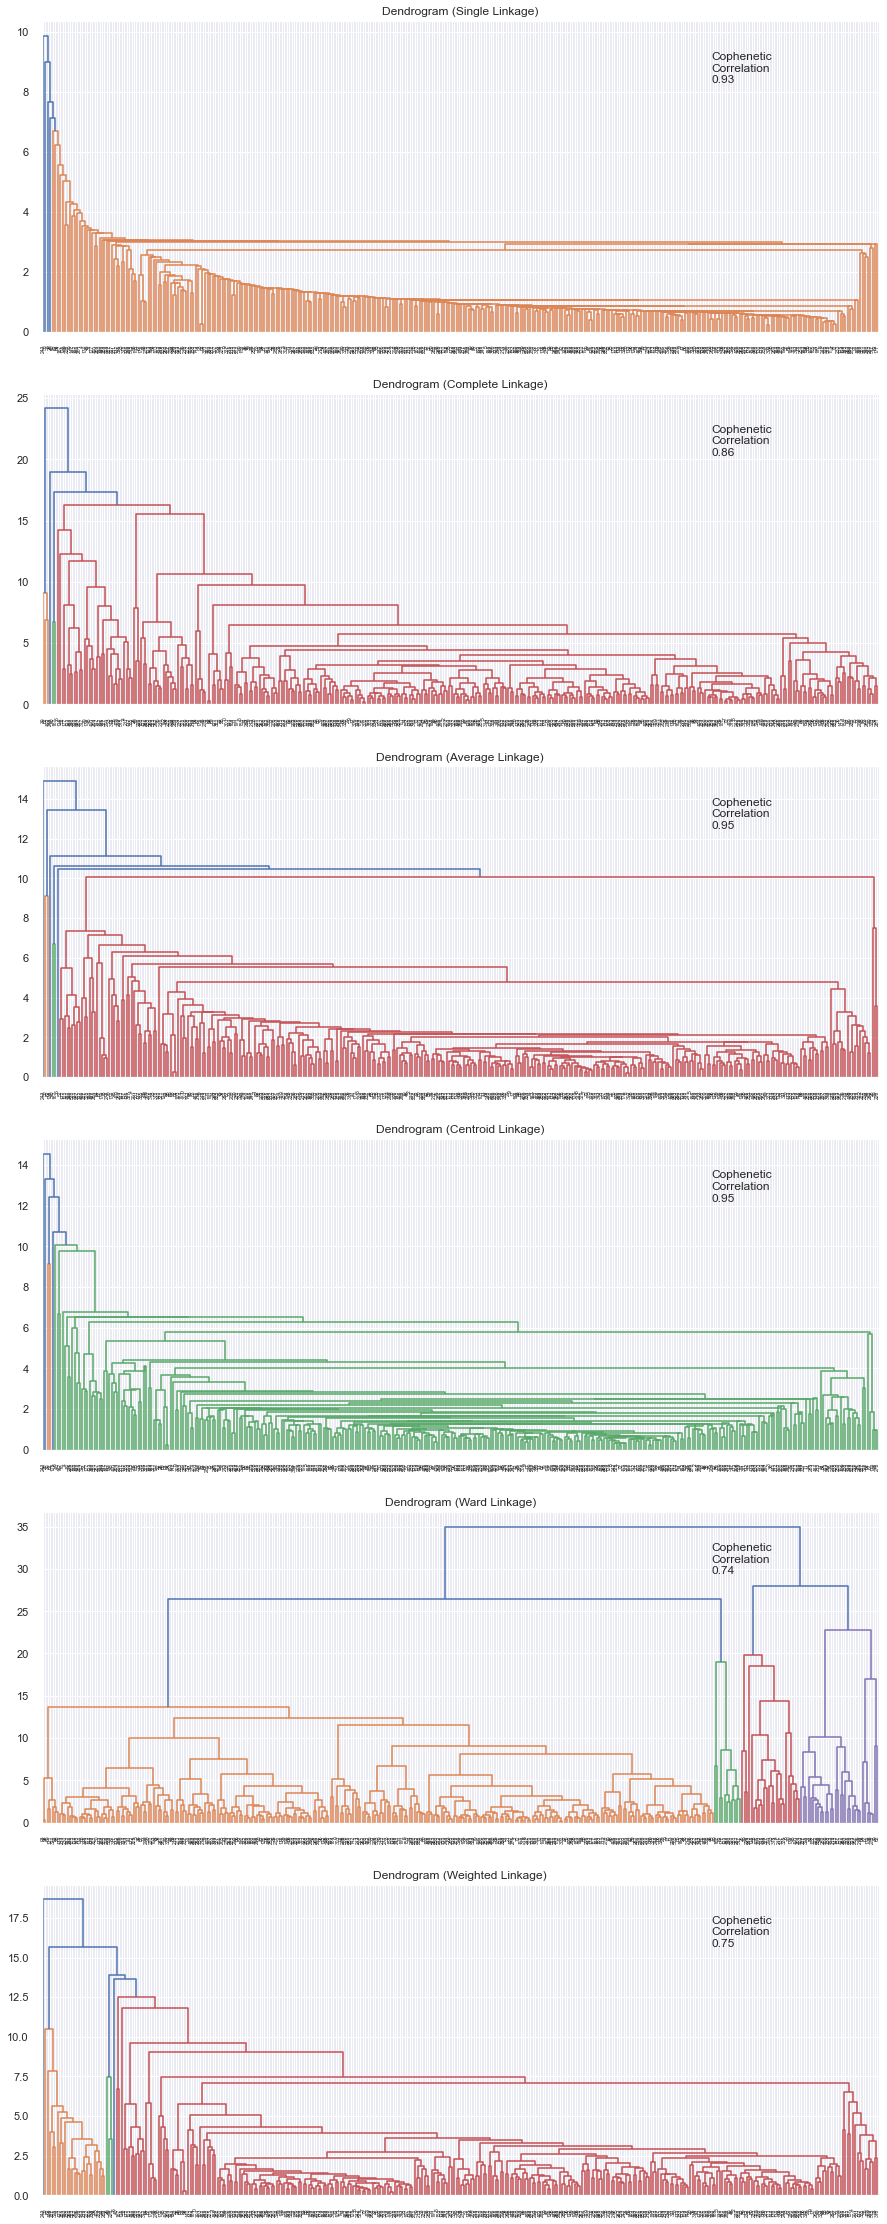

In [610]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 40))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",)

- From de dendrogram the ward linkage appear to have the best split of clusters
so let's try euclidian with average and ward linkage. 

### Creating model using sklearn

In [611]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage='average')
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [612]:
# creating a copy of the original data
df2 = df.copy()
# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [613]:
cluster_profile = df2.groupby("HC_segments").mean()

In [614]:
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [615]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_segments,,,,,,,,,,,,
0,77.573266,4.148438,1.515708,35.184524,67.154762,67104693.452381,1607391086.309524,2.905640,572317821.413095,32.325679,-1.762402,336
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1


In [616]:
#companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC I

In [617]:
#number of companies per sector in each cluster
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     49
             Health Care                    40
             Industrials                    53
             Information Technology         32
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          1
2            Energy                          2
3            Information Technology          1
Name: Security, dtype: int64

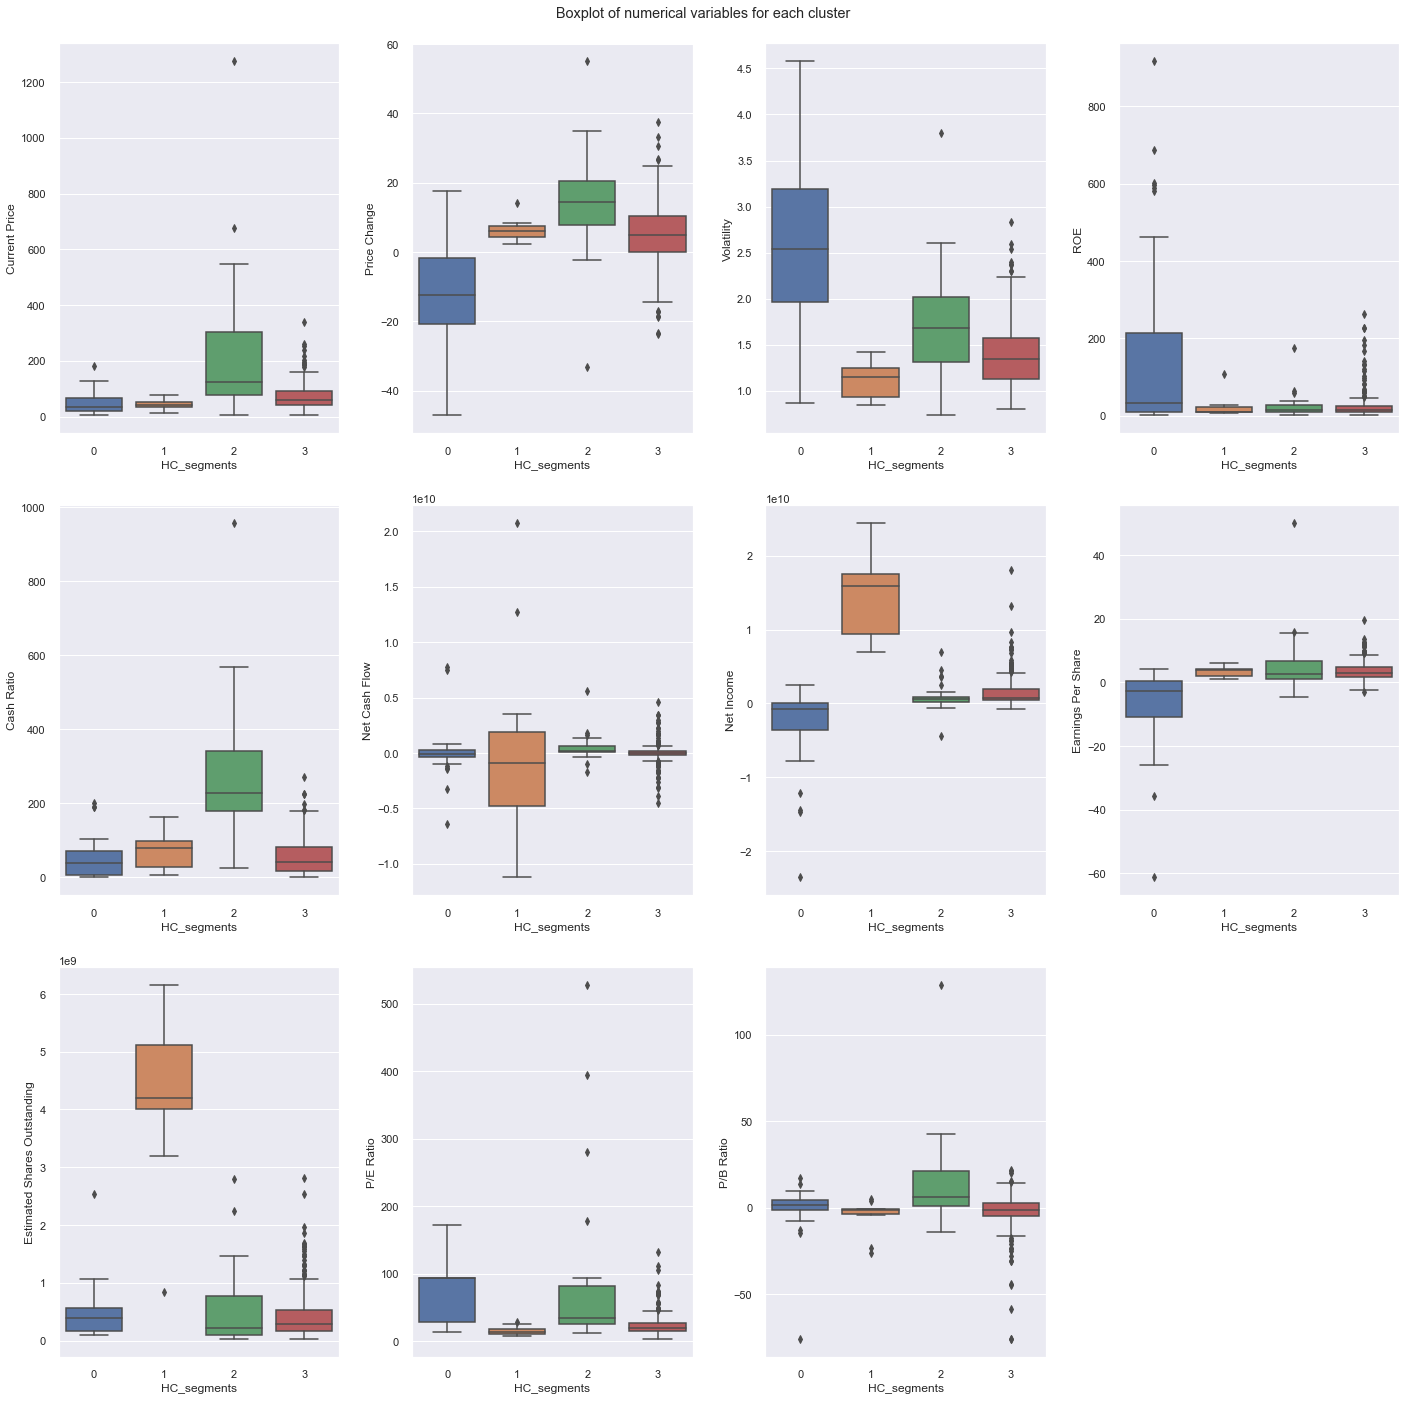

In [628]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

- We have just one company in two of the 4 clusters and 2 companies in other one. Let's try the ward linkage to see if we get a different distribution of companies in the clusters

In [619]:
#triying with ward
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(hc_df)
AgglomerativeClustering(n_clusters=4)
# creating a copy of the original data
df2 = df.copy()

#adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_
#Cluster Profiling
hc_cluster_profile = df2.groupby("HC_segments").mean()
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,46.558126,-11.798670,2.617878,178.750000,50.250000,43497156.250000,-3197471875.000000,-7.785312,473289495.126250,72.496532,-0.780467,32
1,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
2,246.574304,14.284326,1.769621,26.500000,279.916667,459120250.000000,1009205541.666667,6.167917,549432140.538333,90.097512,14.081386,24
3,71.846974,4.953643,1.392784,25.117216,53.831502,1197787.545788,1557673743.589744,3.691044,443918320.070366,23.583804,-3.087957,273


In [620]:
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle Internati

In [621]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                2
             Energy                         23
             Financials                      1
             Industrials                     2
             Information Technology          2
             Materials                       1
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
2            Consumer Discretionary          6
             Consumer Staples                1
             Health Care                     9
             Information Technology          6
             Real Estate                     1
             Telecommunications Services     1
3            Consum

- Cluster 0:

    - There are 32 companies in this group.
    -  The stocks of the companies in this cluster have an average price of $46.56.
    - Over the last 13 weeks, the stock prices of these companies have depreciated significantly by an average of -11.80%.
    - These companies show the highest volatility among all the groups, with an average volatility of 2.62. This indicates that their stock prices have been fluctuating widely, suggesting potential for both high returns and high risk.
    - The Return on Equity (ROE) for these companies is remarkably high, at an average of 178.75%. This suggests that the companies in this group are generating substantial profits in relation to their shareholders' equity, making them appealing to investors seeking higher returns.
    - Despite having the lowest cash ratio among the clusters, averaging around 50.25, it's not considered critically low. This suggests that while the liquidity position is moderate, the companies can still cover their short-term liabilities.
    - Despite the price depreciation, these companies have a positive net cash flow, generating an average of $43,497,156.25. This indicates that they are generating more cash than they are spending, which is a positive sign for financial stability.
    - On the downside, these companies have negative net income, with an average of -$3,197,471,875. This suggests that their total expenses, interest, and taxes outweigh their total revenues.
    - Earnings per Share (EPS) for this cluster are negative, indicating potential financial challenges and suggesting that investors might not receive positive returns per share.
    - The average estimated number of outstanding shares is moderate, around 473 million.
    - The Price-to-Earnings (P/E) ratio for this cluster is high, averaging 72.50. This indicates that the market has high expectations for these companies, likely due to their high-risk profile and potential for high returns.
    - The Price-to-Book (P/B) ratio is also negative, averaging around -0.78. This could imply that the market perceives these companies to be undervalued, potentially due to the higher risk associated with them.

    
- Cluster 1:

    - There are 11 companies in this group.
    - The stocks of the companies in this cluster have an average price of $42.85.
    - Over the last 13 weeks, the stock prices of these companies have increased by an average of 6.27%.
    - The volatility for this group is relatively low, with an average volatility of 1.12, indicating more stability in stock prices.
    - The Return on Equity (ROE) for these companies is moderate, averaging around 22.73%. This suggests decent profitability compared to shareholders' equity.
    - The cash ratio for these companies is relatively high at approximately 71.45. This indicates a strong liquidity position and the ability to cover short-term liabilities.
    - These companies have a significant positive net cash flow, averaging $558,636,363.64, indicating good cash generation.
    - The net income is also positively high, averaging $14,631,272,727.27, suggesting strong profitability.
    - Earnings per Share (EPS) for this cluster are positive, indicating that investors are receiving positive returns per share.
    - The average estimated number of outstanding shares is high, around 4.24 billion.
    - The Price-to-Earnings (P/E) ratio is moderate at 15.24, indicating that the market values these companies based on their current earnings.
    - The Price-to-Book (P/B) ratio is significantly negative at around -4.92, which could suggest that these companies are undervalued, potentially due to market sentiment or future growth potential.


- Cluster 2:

    - There are 24 companies in this group.
    - The stocks of the companies in this cluster have an average price of $246.57.
    - Over the last 13 weeks, the stock prices of these companies have increased by an average of 14.28%.
    - The volatility for this group is moderate, with an average volatility of 1.77, indicating some fluctuation in stock prices.
    - The Return on Equity (ROE) for these companies is moderate, averaging around 26.50%, indicating decent profitability compared to shareholders' equity.
    - The cash ratio for these companies is relatively high at approximately 279.92, suggesting a strong liquidity position.
    - These companies have a positive net cash flow, averaging $459,120,250, indicating healthy cash generation.
    - The net income is positive, averaging $1,009,205,541.67, suggesting profitability.
    - Earnings per Share (EPS) for this cluster are positive, indicating that investors are receiving positive returns per share.
    - The average estimated number of outstanding shares is moderate, around 549.43 million.
    - The Price-to-Earnings (P/E) ratio is high at 90.10, indicating that the market has high expectations for these companies, potentially due to growth prospects or perceived risk.
    - The Price-to-Book (P/B) ratio is positive at around 14.08, which suggests that these companies might be slightly overvalued compared to their book value.

- Cluster 3:

    - There are 273 companies in this group.
    - The stocks of the companies in this cluster have an average price of $71.85.
    - Over the last 13 weeks, the stock prices of these companies have increased by an average of 4.95%.
    - The volatility for this group is moderate, with an average volatility of 1.39, indicating moderate fluctuations in stock prices.
    - The Return on Equity (ROE) for these companies is moderate, averaging around 25.12%, suggesting decent profitability compared to shareholders' equity.
    - The cash ratio for these companies is relatively low at approximately 53.83, suggesting a moderate liquidity position.
    - These companies have a positive net cash flow, averaging $1,197,787.55, indicating positive cash generation.
    - The net income is positive, averaging $1,557,673,743.59, suggesting profitability.
    - Earnings per Share (EPS) for this cluster are positive, indicating that investors are receiving positive returns per share.
    - The average estimated number of outstanding shares is moderate, around 443.92 million.
    - The Price-to-Earnings (P/E) ratio is moderate at 23.58, suggesting the market values these companies based on their earnings.
    - The Price-to-Book (P/B) ratio is negative at around -3.09, which could indicate undervaluation.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?

    - There was not  a meaningful difference between the techniques.

- Which clustering technique gave you more distinct clusters, or are they the same?

    - Hierarchical Clustering give us more distinct clusters.

- How many observations are there in the similar clusters of both algorithms?

    - For K-means clustering:

        - Cluster 0: 277 observations
        - Cluster 1: 11 observations
        - Cluster 2: 27 observations
        - Cluster 3: 25 observations

    - For hierarchical clustering (with ward linkage):

        - Cluster 0: 32 observations
        - Cluster 1: 11 observations
        - Cluster 2: 24 observations
        - Cluster 3: 273 observations

  - The similar clusters between the two algorithms are Cluster 1, both of which have 11 observations each.      

- How many clusters are obtained as the appropriate number of clusters from both algorithms? 
    - 4 for both of them

## Actionable Insights and Recommendations

- Hierarchical Clusters with Ward Linkage:
    - Cluster 0:
        - Based on this analysis, investors considering Cluster 0 should be aware of the high risk associated with these companies. While the potential for high returns exists because of the high ROE and stock price volatility, the negative net income and negative EPS raise concerns about the companies' financial stability. The high P/E ratio suggests that the market has high expectations, possibly caused by the potential for large gains. However, the negative P/B ratio could show that these companies are undervalued, potentially from the possible risk. Therefore, investing in this cluster requires careful evaluation of risk and the potential for both gains and losses.
    - Cluster 1:
        - Investors considering Cluster 1 should note that these companies have shown recent price appreciation, indicating market confidence. The lower volatility and positive EPS indicate more stability and profitability. The high cash ratio, positive net cash flow, and positive net income seem like financial strength. However, the negative P/B ratio might indicate that these companies are undervalued, possibly due to factors like growth expectations. Investors could view this cluster as a blend of stability and potential, with opportunities for value appreciation.
    - Cluster 2:
        - Investors considering Cluster 2 should note that these companies have experienced significant price appreciation in the last 13 weeks. The moderate volatility, positive EPS, and positive net income indicate potential stability and ability to make a profit. The high cash ratio suggests strong liquidity and ability to cover short-term liabilities. However, the high P/E ratio suggests that the market has high expectations for these companies, possibly driven by growth prospects. The positive P/B ratio might indicate that these companies are trading at a premium compared to their book value.
    - Cluster 3:
        - Investors considering Cluster 3 should be aware that these companies have experienced moderate price appreciation in the last 13 weeks. The moderate volatility and positive EPS suggest a relatively stable and profitable group. The positive net cash flow and net income indicate financial strength. The moderate P/E ratio suggests reasonable valuation based on earnings. The negative P/B ratio might suggest undervaluation, potentially because of the perceived risk or other factors.
    


- General Recommendations:

    - Continuously enhance your portfolio by including opportunities from various clusters.
    - Empower customers with insights on risks and opportunities associated with each cluster. Prior to investing, conduct thorough research on individual companies to understand their financial standing and risks.
    - Taking advantage of expert recommendations and educational resources can help investors in comprehending that each cluster carries its unique blend of risk and reward. When making investment choices, prioritize understanding these profiles and ensuring alignment with the customer's personal investment goals and risk threshold.

### Dimensionality Reduction using PCA for visualization

In [622]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [623]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.38582780003372186

The first two principal components explain 38.5% of the variance in the data.

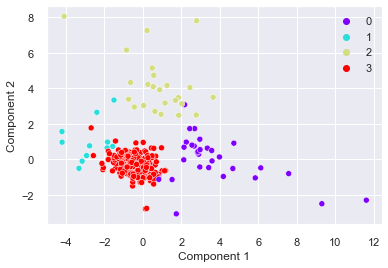

In [624]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df2["HC_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1));

- Cluster 3 is the major cluster follow by cluster 0